In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [65]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
           })

In [66]:
topzip = pd.read_csv('topzip.csv')
topzip.head()

,time,Zipcode,value
0,1996-04-01,7030,301600.0
1,1996-04-01,11211,133200.0
2,1996-04-01,7302,137200.0
3,1996-04-01,11216,146100.0
4,1996-04-01,11222,149200.0


In [67]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [68]:
NY = topzip[topzip['Zipcode'].isin(['11211', '11222', '11216'])]


# Zipcode : 11211

In [69]:
first = NY[NY['Zipcode'] == 11211]
first.drop(['Zipcode'], axis=1, inplace=True)

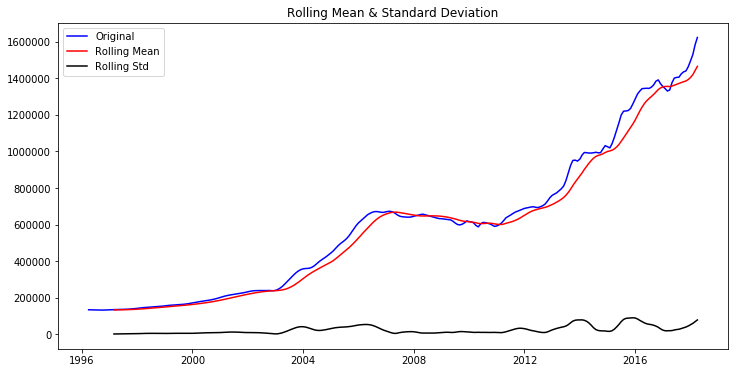

In [70]:
roll_mean = first.rolling(window=12, center=False).mean()
roll_std = first.rolling(window=12, center=False).std()


fig = plt.figure(figsize=(12,6))
plt.plot(first, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9986576909330424
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.988403
p-value                          0.998658
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


Differencing

In [72]:
diff_first = first.diff().dropna()


In [73]:
dftest = adfuller(diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.14715576436846628
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.381053
p-value                          0.147156
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [75]:
second_diff_first = diff_first.diff().dropna()


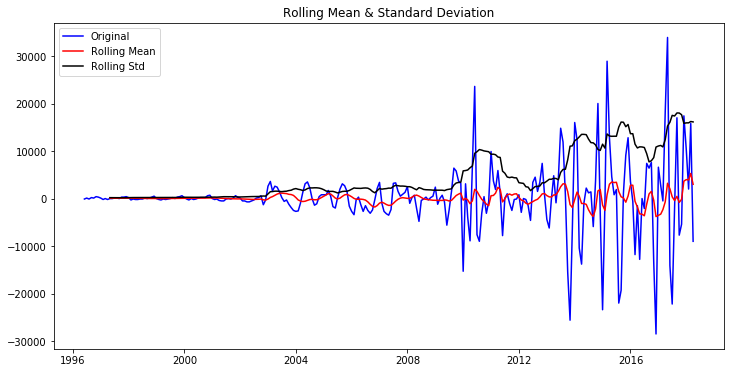

In [76]:
roll_mean = second_diff_first.rolling(window=12, center=False).mean()
roll_std = second_diff_first.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_first, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [77]:
dftest = adfuller(second_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 1.1773741124897639e-07
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.066657e+00
p-value                        1.177374e-07
#Lags Used                     1.300000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [15]:
# first['time'] = pd.to_datetime(first['time'])
# first['year'], first['month'] = first['time'].apply(lambda x: x.year), first['time'].apply(lambda x: x.month)
# first

,time,value,year,month
0,1996-04-01,133200.0,1996,4
1,1996-05-01,132900.0,1996,5
2,1996-06-01,132500.0,1996,6
3,1996-07-01,132200.0,1996,7
4,1996-08-01,131800.0,1996,8
...,...,...,...,...
260,2017-12-01,1463100.0,2017,12
261,2018-01-01,1496100.0,2018,1
262,2018-02-01,1531100.0,2018,2
263,2018-03-01,1581900.0,2018,3


In [19]:
dfs_ts = []
for yr in first.year.unique():
    #Create separate dataframes for each zipcode with a monthly frequency.
    df = first[first['year']==yr].asfreq('MS')
    dfs_ts.append(df)

In [20]:
for i in range(len(dfs_ts)):
    print(f'Value descriptive statistics for zipcode {dfs_ts[i].year[0]}:')
    print(f'{dfs_ts[i].value.describe()}\n')

Value descriptive statistics for zipcode 1996:
count         9.000000
mean     132211.111111
std         590.432986
min      131500.000000
25%      131800.000000
50%      132200.000000
75%      132500.000000
max      133200.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 1997:
count        12.000000
mean     135658.333333
std        1984.695229
min      133100.000000
25%      134325.000000
50%      135200.000000
75%      136600.000000
max      139800.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 1998:
count        12.000000
mean     147275.000000
std        3468.854933
min      141500.000000
25%      145025.000000
50%      147350.000000
75%      149525.000000
max      153100.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 1999:
count        12.000000
mean     161016.666667
std        4036.612741
min      154800.000000
25%      158325.000000
50%      160700.000000
75%      163425.000000
max      168

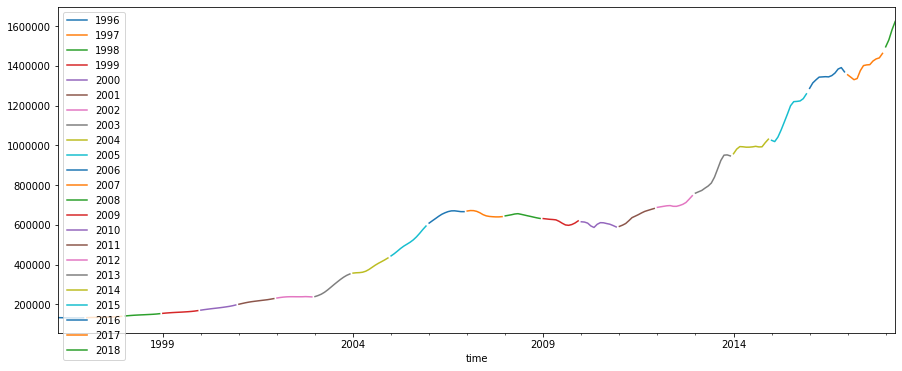

In [21]:
for i in range(23):
    dfs_ts[i].value.plot(label=dfs_ts[i].year[0],figsize=(15,6))
    plt.legend()

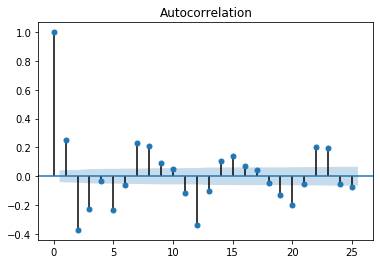

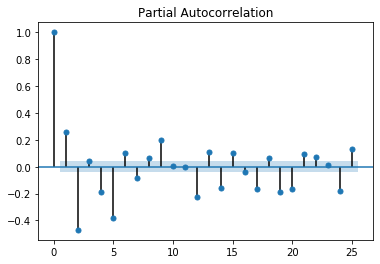

In [78]:
plot_acf(second_diff_first[:-1], alpha=0.5);
plot_pacf(second_diff_first[:-1], alpha=0.5);

In [116]:
global first_summary
first_zip_summary = pd.DataFrame(columns = ['Order', 'AIC', 'BIC', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse'])
first_zip_summary

orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (2, 2, 2), (3, 1, 1), (3, 2, 1), (3, 2, 2),(3, 2, 3),(4, 1, 1)] 

def model_build(df, orders):
    train = df[:'2015-04']
    test = df['2015-05':]
    for i in orders:
        order = i
        model = ARIMA(train, order=i)
        fitted = model.fit(disp=-1)
        train_fc, se, conf = fitted.forecast(229, alpha=0.05)
        test_fc, se, conf = fitted.forecast(36, alpha=0.05)
        aic = fitted.aic 
        bic = fitted.bic

        train_mse = round(mean_squared_error(train.values, train_fc), 2)
        test_mse = round(mean_squared_error(test.values, test_fc), 2)
        train_rmse = round(np.sqrt(train_mse), 2)
        test_rmse = round(np.sqrt(test_mse), 2)
        global first_zip_summary
        first_zip_summary = first_zip_summary.append({'Order': str(order), 'AIC': aic, 'BIC': bic, 
                                                      'train_mse': train_mse, 'test_mse': test_mse, 
                                                      'train_rmse': train_rmse, 'test_rmse': test_rmse,
#                                                      'train_mape': train_mape, 'test_mape': test_mape
                                                     },
                                ignore_index=True)
    return first_zip_summary

In [117]:
model_build(first,orders)

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
0,"(1, 0, 0)",4824.928386,4835.229552,4.242783e+11,8.994046e+10,651366.49,299900.74
1,"(1, 1, 0)",4530.754605,4541.042642,1.620712e+12,9.019166e+09,1273071.68,94969.29
2,"(2, 1, 3)",4380.188092,4404.193511,1.432404e+12,1.581584e+10,1196830.79,125761.05
3,"(2, 2, 2)",4413.071162,4433.620862,1.036424e+13,7.068811e+09,3219353.81,84076.22
4,"(3, 1, 1)",4421.499211,4442.075285,1.363528e+12,2.340158e+10,1167701.99,152975.74
5,"(3, 2, 1)",4417.479769,4438.029469,1.474254e+13,1.991984e+10,3839601.53,141137.65
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
8,"(4, 1, 1)",4423.380094,4447.385513,1.303610e+12,2.503010e+10,1141757.37,158209.04


In [84]:
first_zip_summary.sort_values('AIC',axis=0,ascending=True)[:3]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
2,"(2, 1, 3)",4380.188092,4404.193511,1.432404e+12,1.581584e+10,1196830.79,125761.05
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56


In [86]:
train = first.value[:'2015-04']
test = first.value['2015-05':]

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -2173.877
Method:                       css-mle   S.D. of innovations           3416.783
Date:                Tue, 05 May 2020   AIC                           4363.753
Time:                        23:31:50   BIC                           4391.153
Sample:                    06-01-1996   HQIC                          4374.809
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             56.4609     80.336      0.703      0.483    -100.996     213.918
ar.L1.D2.value    -0.2166      0.085     -2.544      0.012      -0.383      -0.050
ar.L2.D2.value     0.0809      0.097

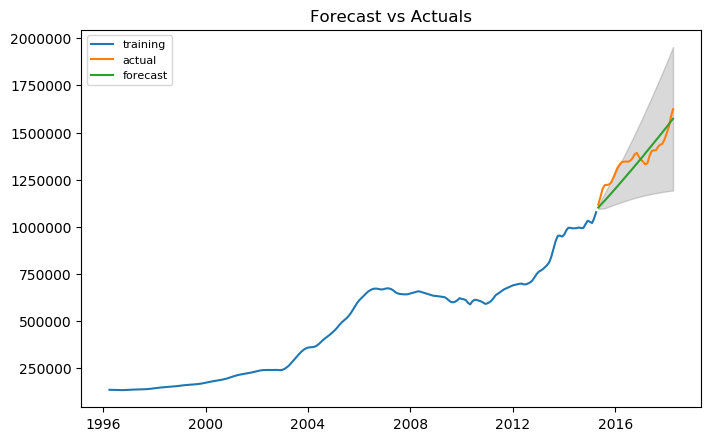

In [91]:
model = ARIMA(train, order=(3, 2, 3))  
fitted = model.fit(disp=-1)  

print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(36, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Zipcode : 11222

In [92]:
second = NY[NY['Zipcode'] == 11222]
second.drop(['Zipcode'], axis=1, inplace=True)

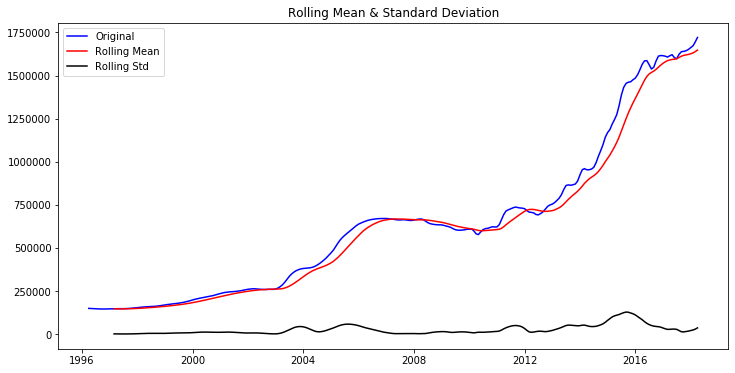

In [93]:
roll_mean = second.rolling(window=12, center=False).mean()
roll_std = second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [94]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9945168916750926
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.024405
p-value                          0.994517
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Differencing 

In [95]:
diff_second = second.diff().dropna()


In [96]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.2753256570685175
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.025918
p-value                          0.275326
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [97]:
second_diff_second = diff_second.diff().dropna()


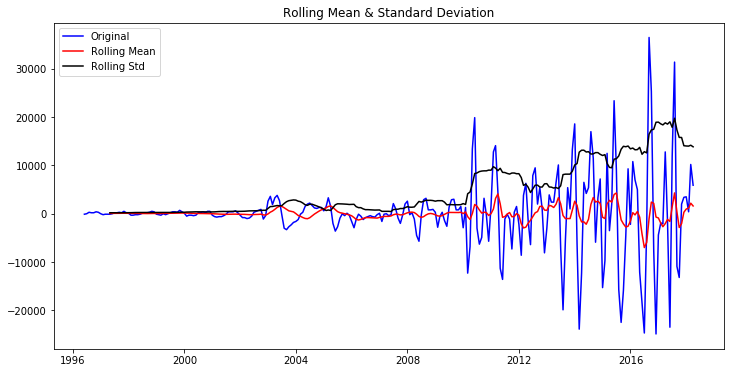

In [98]:
roll_mean = second_diff_second.rolling(window=12, center=False).mean()
roll_std = second_diff_second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_second, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [99]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 2.5818511123123906e-08
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.353100e+00
p-value                        2.581851e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


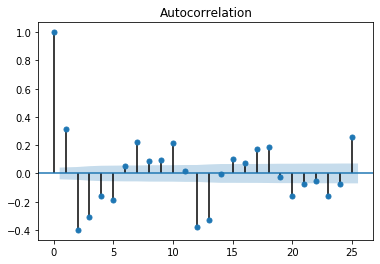

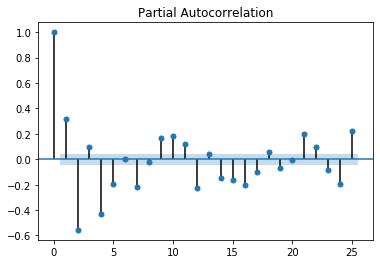

In [100]:
plot_acf(second_diff_second[:-1], alpha=0.5);
plot_pacf(second_diff_second[:-1], alpha=0.5);

In [119]:
global second_summary
second_zip_summary = pd.DataFrame(columns = ['Order', 'AIC', 'BIC', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse'])
second_zip_summary

orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (2, 2, 2), (3, 1, 1), (3, 2, 1), (3, 2, 2),(3, 2, 3),(4, 1, 1)] 

def model_build(df, orders):
    train = df[:'2015-04']
    test = df['2015-05':]
    for i in orders:
        order = i
        model = ARIMA(train, order=i)
        fitted = model.fit(disp=-1)
        train_fc, se, conf = fitted.forecast(229, alpha=0.05)
        test_fc, se, conf = fitted.forecast(36, alpha=0.05)
        aic = fitted.aic 
        bic = fitted.bic

        train_mse = round(mean_squared_error(train.values, train_fc), 2)
        test_mse = round(mean_squared_error(test.values, test_fc), 2)
        train_rmse = round(np.sqrt(train_mse), 2)
        test_rmse = round(np.sqrt(test_mse), 2)
        global second_zip_summary
        second_zip_summary = second_zip_summary.append({'Order': str(order), 'AIC': aic, 'BIC': bic, 
                                                      'train_mse': train_mse, 'test_mse': test_mse, 
                                                      'train_rmse': train_rmse, 'test_rmse': test_rmse,
#                                                      'train_mape': train_mape, 'test_mape': test_mape
                                                     },
                                ignore_index=True)
    return second_zip_summary

In [120]:
model_build(second, orders)

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
0,"(1, 0, 0)",4906.327645,4916.628811,6.349301e+11,1.105571e+11,796824.98,332501.25
1,"(1, 1, 0)",4515.089327,4525.377364,2.345226e+12,1.168528e+10,1531412.97,108098.46
2,"(2, 1, 3)",4341.162340,4365.167760,2.141912e+12,1.663178e+10,1463527.34,128964.26
3,"(2, 2, 2)",4346.782347,4367.332047,1.229029e+13,9.600235e+09,3505751.45,97980.79
4,"(3, 1, 1)",4401.413188,4421.989261,1.844245e+12,3.548784e+10,1358029.67,188382.18
5,"(3, 2, 1)",4396.129986,4416.679686,1.370023e+13,1.179984e+10,3701381.98,108627.05
6,"(3, 2, 2)",4341.963905,4365.938555,3.352379e+13,1.905759e+10,5789972.97,138049.24
7,"(3, 2, 3)",4324.311255,4351.710855,1.571662e+13,1.642148e+10,3964419.29,128146.33
8,"(4, 1, 1)",4395.617653,4419.623072,1.732155e+12,5.055172e+10,1316113.45,224837.09


In [61]:
second_zip_summary.sort_values('AIC',axis=0,ascending=True)[:2]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
7,"(3, 2, 3)",4324.311255,4351.710855,1.571662e+13,1.642148e+10,3964419.29,128146.33
2,"(2, 1, 3)",4341.162340,4365.167760,2.141912e+12,1.663178e+10,1463527.34,128964.26


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -2173.877
Method:                       css-mle   S.D. of innovations           3416.783
Date:                Tue, 05 May 2020   AIC                           4363.753
Time:                        23:33:41   BIC                           4391.153
Sample:                    06-01-1996   HQIC                          4374.809
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             56.4609     80.336      0.703      0.483    -100.996     213.918
ar.L1.D2.value    -0.2166      0.085     -2.544      0.012      -0.383      -0.050
ar.L2.D2.value     0.0809      0.097

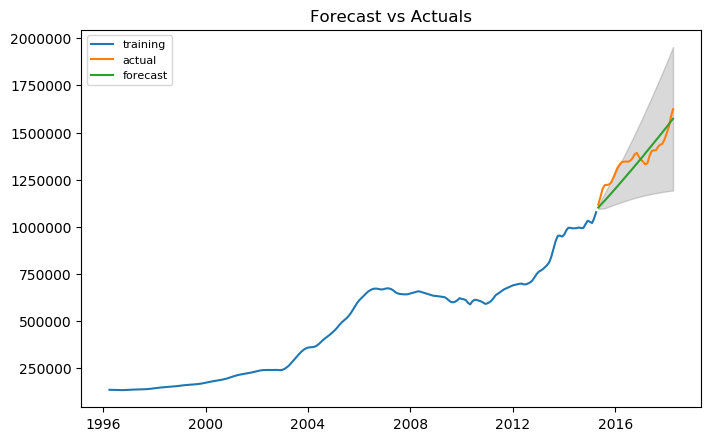

In [101]:
model = ARIMA(train, order=(3, 2, 3))  
fitted = model.fit(disp=-1)  

print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(36, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# Zipcode : 11216

In [102]:
third = NY[NY['Zipcode'] == 11216]
third.drop(['Zipcode'], axis=1, inplace=True)

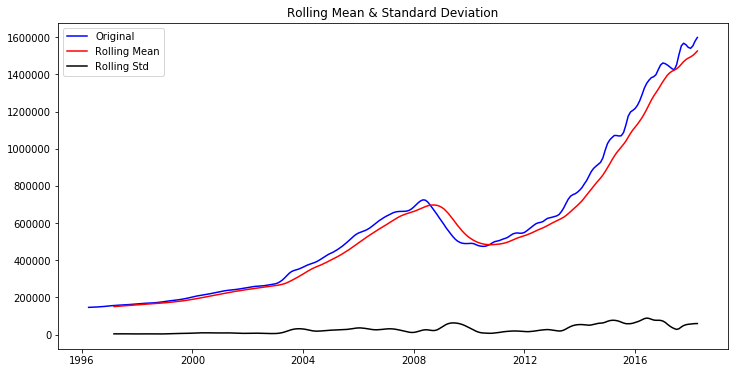

In [103]:
roll_mean = third.rolling(window=12, center=False).mean()
roll_std = third.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(third, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [104]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9724380332622605
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   0.203156
p-value                          0.972438
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Differencing

In [105]:
diff_third = third.diff().dropna()


In [106]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.3685996101349454
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -1.824028
p-value                          0.368600
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [107]:
second_diff_third = diff_third.diff().dropna()


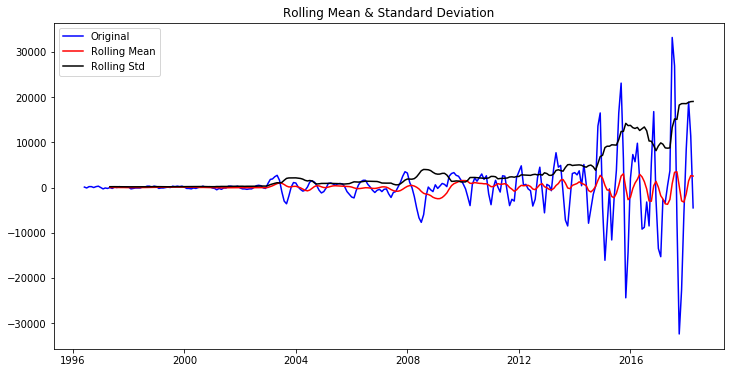

In [111]:
roll_mean = second_diff_third .rolling(window=12, center=False).mean()
roll_std = second_diff_third .rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_third , color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [108]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 4.496299484176765e-06
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -5.341195
p-value                          0.000004
#Lags Used                      15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


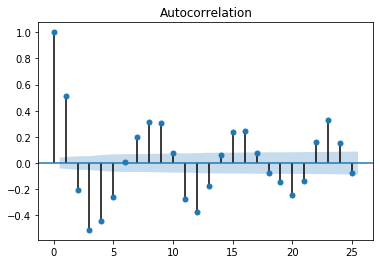

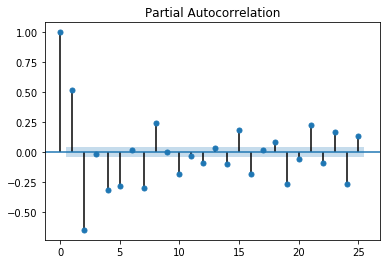

In [112]:
plot_acf(second_diff_third[:-1], alpha=0.5);
plot_pacf(second_diff_third[:-1], alpha=0.5);

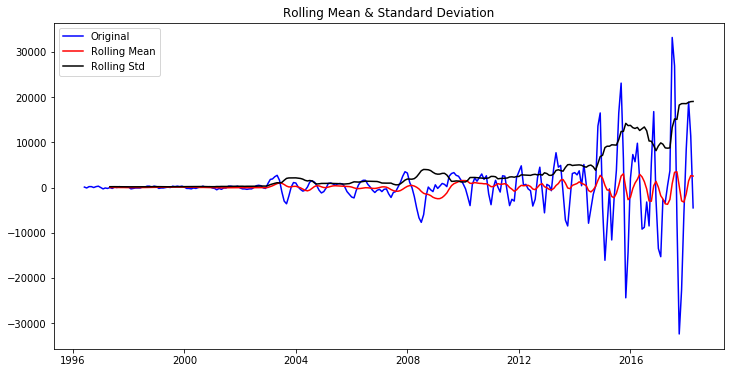

In [128]:
global third_summary
third_zip_summary = pd.DataFrame(columns = ['Order', 'AIC', 'BIC', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse'])
third_zip_summary

orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (2, 2, 2), (3, 1, 1), (3, 2, 1), (3, 2, 2),(3, 2, 3),(4, 1, 1)] 

def model_build(df, orders):
    train = df[:'2015-04']
    test = df['2015-05':]
    for i in orders:
        order = i
        model = ARIMA(train, order=i)
        fitted = model.fit(disp=-1)
        train_fc, se, conf = fitted.forecast(229, alpha=0.05)
        test_fc, se, conf = fitted.forecast(36, alpha=0.05)
        aic = fitted.aic 
        bic = fitted.bic

        train_mse = round(mean_squared_error(train.values, train_fc), 2)
        test_mse = round(mean_squared_error(test.values, test_fc), 2)
        train_rmse = round(np.sqrt(train_mse), 2)
        test_rmse = round(np.sqrt(test_mse), 2)
        global third_zip_summary
        third_zip_summary = third_zip_summary.append({'Order': str(order), 'AIC': aic, 'BIC': bic, 
                                                      'train_mse': train_mse, 'test_mse': test_mse, 
                                                      'train_rmse': train_rmse, 'test_rmse': test_rmse,
#                                                      'train_mape': train_mape, 'test_mape': test_mape
                                                     },
                                ignore_index=True)
    return third_zip_summary

In [129]:
model_build(third,orders)

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
0,"(1, 0, 0)",4829.894339,4840.195505,4.290600e+11,1.149968e+11,655026.68,339111.74
1,"(1, 1, 0)",4270.135292,4280.423329,1.430213e+12,3.267162e+10,1195915.30,180752.92
2,"(2, 1, 3)",4058.750545,4082.755965,1.272212e+12,5.042268e+10,1127923.59,224549.95
3,"(2, 2, 2)",4072.148109,4092.697809,1.616473e+13,1.293310e+10,4020538.27,113723.80
4,"(3, 1, 1)",4092.787915,4113.363989,1.431773e+12,3.230449e+10,1196567.34,179734.51
5,"(3, 2, 1)",4082.226971,4102.776671,1.099529e+13,2.215227e+09,3315915.10,47066.19
6,"(3, 2, 2)",4073.362872,4097.337522,1.516097e+13,9.602647e+09,3893708.75,97993.10
7,"(3, 2, 3)",4036.652061,4064.051661,1.246215e+13,3.354159e+09,3530176.85,57915.10
8,"(4, 1, 1)",4094.794024,4118.799443,1.403598e+12,3.249202e+10,1184735.54,180255.42


In [145]:
global summary
zip_summary = pd.DataFrame(columns = ['Order', 'AIC', 'BIC', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse'])
zip_summary

orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (2, 2, 2), (3, 1, 1), (3, 2, 1), (3, 2, 2),(3, 2, 3),(4, 1, 1)] 

def model(df, orders):
    train = df[:'2015-04']
    test = df['2015-05':]
    for i in orders:
        order = i
        model = ARIMA(train, order=i)
        fitted = model.fit(disp=-1)
        train_fc, se, conf = fitted.forecast(229, alpha=0.05)
        test_fc, se, conf = fitted.forecast(36, alpha=0.05)
        aic = fitted.aic 
        bic = fitted.bic

        train_mse = round(mean_squared_error(train.values, train_fc), 2)
        test_mse = round(mean_squared_error(test.values, test_fc), 2)
        train_rmse = round(np.sqrt(train_mse), 2)
        test_rmse = round(np.sqrt(test_mse), 2)
        global zip_summary
        zip_summary = zip_summary.append({'Order': str(order), 'AIC': aic, 'BIC': bic, 
                                                      'train_mse': train_mse, 'test_mse': test_mse, 
                                                      'train_rmse': train_rmse, 'test_rmse': test_rmse,
#                                                      'train_mape': train_mape, 'test_mape': test_mape
                                                     },
                                ignore_index=True)
    return zip_summary

In [148]:
model(third,orders)

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
0,"(1, 0, 0)",4824.928386,4835.229552,4.242783e+11,8.994046e+10,651366.49,299900.74
1,"(1, 1, 0)",4530.754605,4541.042642,1.620712e+12,9.019166e+09,1273071.68,94969.29
2,"(2, 1, 3)",4380.188092,4404.193511,1.432404e+12,1.581584e+10,1196830.79,125761.05
3,"(2, 2, 2)",4413.071162,4433.620862,1.036424e+13,7.068811e+09,3219353.81,84076.22
4,"(3, 1, 1)",4421.499211,4442.075285,1.363528e+12,2.340158e+10,1167701.99,152975.74
5,"(3, 2, 1)",4417.479769,4438.029469,1.474254e+13,1.991984e+10,3839601.53,141137.65
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
8,"(4, 1, 1)",4423.380094,4447.385513,1.303610e+12,2.503010e+10,1141757.37,158209.04
9,"(1, 0, 0)",4906.327645,4916.628811,6.349301e+11,1.105571e+11,796824.98,332501.25


In [169]:
first_zipcode = zip_summary.iloc[:9]
second_zipcode = zip_summary.iloc[9:18]
third_zipcode = zip_summary.iloc[17:]



In [170]:
first_zipcode

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
0,"(1, 0, 0)",4824.928386,4835.229552,4.242783e+11,8.994046e+10,651366.49,299900.74
1,"(1, 1, 0)",4530.754605,4541.042642,1.620712e+12,9.019166e+09,1273071.68,94969.29
2,"(2, 1, 3)",4380.188092,4404.193511,1.432404e+12,1.581584e+10,1196830.79,125761.05
3,"(2, 2, 2)",4413.071162,4433.620862,1.036424e+13,7.068811e+09,3219353.81,84076.22
4,"(3, 1, 1)",4421.499211,4442.075285,1.363528e+12,2.340158e+10,1167701.99,152975.74
5,"(3, 2, 1)",4417.479769,4438.029469,1.474254e+13,1.991984e+10,3839601.53,141137.65
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
8,"(4, 1, 1)",4423.380094,4447.385513,1.303610e+12,2.503010e+10,1141757.37,158209.04


In [171]:
second_zipcode

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
9,"(1, 0, 0)",4906.327645,4916.628811,6.349301e+11,1.105571e+11,796824.98,332501.25
10,"(1, 1, 0)",4515.089327,4525.377364,2.345226e+12,1.168528e+10,1531412.97,108098.46
11,"(2, 1, 3)",4341.162340,4365.167760,2.141912e+12,1.663178e+10,1463527.34,128964.26
12,"(2, 2, 2)",4346.782347,4367.332047,1.229029e+13,9.600235e+09,3505751.45,97980.79
13,"(3, 1, 1)",4401.413188,4421.989261,1.844245e+12,3.548784e+10,1358029.67,188382.18
14,"(3, 2, 1)",4396.129986,4416.679686,1.370023e+13,1.179984e+10,3701381.98,108627.05
15,"(3, 2, 2)",4341.963905,4365.938555,3.352379e+13,1.905759e+10,5789972.97,138049.24
16,"(3, 2, 3)",4324.311255,4351.710855,1.571662e+13,1.642148e+10,3964419.29,128146.33
17,"(4, 1, 1)",4395.617653,4419.623072,1.732155e+12,5.055172e+10,1316113.45,224837.09


In [172]:
third_zipcode

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
17,"(4, 1, 1)",4395.617653,4419.623072,1.732155e+12,5.055172e+10,1316113.45,224837.09
18,"(1, 0, 0)",4829.894339,4840.195505,4.290600e+11,1.149968e+11,655026.68,339111.74
19,"(1, 1, 0)",4270.135292,4280.423329,1.430213e+12,3.267162e+10,1195915.30,180752.92
20,"(2, 1, 3)",4058.750545,4082.755965,1.272212e+12,5.042268e+10,1127923.59,224549.95
21,"(2, 2, 2)",4072.148109,4092.697809,1.616473e+13,1.293310e+10,4020538.27,113723.80
22,"(3, 1, 1)",4092.787915,4113.363989,1.431773e+12,3.230449e+10,1196567.34,179734.51
23,"(3, 2, 1)",4082.226971,4102.776671,1.099529e+13,2.215227e+09,3315915.10,47066.19
24,"(3, 2, 2)",4073.362872,4097.337522,1.516097e+13,9.602647e+09,3893708.75,97993.10
25,"(3, 2, 3)",4036.652061,4064.051661,1.246215e+13,3.354159e+09,3530176.85,57915.10
26,"(4, 1, 1)",4094.794024,4118.799443,1.403598e+12,3.249202e+10,1184735.54,180255.42


In [173]:
first_zipcode.sort_values('AIC',axis=0,ascending=True)[:3]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
2,"(2, 1, 3)",4380.188092,4404.193511,1.432404e+12,1.581584e+10,1196830.79,125761.05
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56


In [176]:
first_zipcode.sort_values('test_rmse',axis=0,ascending=True)[:3]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
7,"(3, 2, 3)",4363.753065,4391.152665,7.464784e+12,3.696349e+09,2732175.72,60797.60
3,"(2, 2, 2)",4413.071162,4433.620862,1.036424e+13,7.068811e+09,3219353.81,84076.22
6,"(3, 2, 2)",4404.260266,4428.234916,3.954300e+12,7.648650e+09,1988542.23,87456.56


In [174]:
second_zipcode.sort_values('AIC',axis=0,ascending=True)[:3]

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
16,"(3, 2, 3)",4324.311255,4351.710855,1.571662e+13,1.642148e+10,3964419.29,128146.33
11,"(2, 1, 3)",4341.162340,4365.167760,2.141912e+12,1.663178e+10,1463527.34,128964.26
15,"(3, 2, 2)",4341.963905,4365.938555,3.352379e+13,1.905759e+10,5789972.97,138049.24


In [177]:
second_zipcode.sort_values('test_rmse',axis=0,ascending=True)[:3]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
12,"(2, 2, 2)",4346.782347,4367.332047,1.229029e+13,9.600235e+09,3505751.45,97980.79
10,"(1, 1, 0)",4515.089327,4525.377364,2.345226e+12,1.168528e+10,1531412.97,108098.46
14,"(3, 2, 1)",4396.129986,4416.679686,1.370023e+13,1.179984e+10,3701381.98,108627.05


In [175]:
third_zipcode.sort_values('AIC',axis=0,ascending=True)[:3]

,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
25,"(3, 2, 3)",4036.652061,4064.051661,1.246215e+13,3.354159e+09,3530176.85,57915.10
20,"(2, 1, 3)",4058.750545,4082.755965,1.272212e+12,5.042268e+10,1127923.59,224549.95
21,"(2, 2, 2)",4072.148109,4092.697809,1.616473e+13,1.293310e+10,4020538.27,113723.80


In [178]:
third_zipcode.sort_values('test_rmse',axis=0,ascending=True)[:3]


,Order,AIC,BIC,train_mse,test_mse,train_rmse,test_rmse
23,"(3, 2, 1)",4082.226971,4102.776671,1.099529e+13,2.215227e+09,3315915.10,47066.19
25,"(3, 2, 3)",4036.652061,4064.051661,1.246215e+13,3.354159e+09,3530176.85,57915.10
24,"(3, 2, 2)",4073.362872,4097.337522,1.516097e+13,9.602647e+09,3893708.75,97993.10
